# Homework

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }p=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

We have:

1. **Likelihood**:  
   \\[
   p(x \mid \theta, n) 
   \;=\;
   \binom{n}{x} 
   \,\theta^{x}
   \,\bigl(1-\theta\bigr)^{\,n-x}
   \quad (\text{Binomial})
   \\]

2. **Discrete Uniform Prior** over \\(\theta\\) in increments of \\(\frac{1}{100}\\):  
   \\[
   p(\theta) 
   \;=\;
   \begin{cases}
     \frac{1}{101}, & \theta \;=\; \frac{i}{100},\; i \in \{0,1,2,\dots,100\}, \\
     0, & \text{otherwise}.
   \end{cases}
   \\]

3. **Posterior** via Bayes’ theorem:  
   \\[
   p(\theta \mid x,n)
     \;=\;
   \frac{p(x\mid \theta,n)\,p(\theta)}{p(x)}.
   \]
   Since \(p(x)\) is just a normalizing constant, the *unnormalized* posterior is
   \[
   p(\theta \mid x,n) 
     \;\propto\; 
   \binom{n}{x}\,\theta^{x}\,\bigl(1-\theta\bigr)^{\,n-x}
   \;\times\;
   p(\theta).
   \\]
   But our prior \\(p(\theta)\\) is constant (\\(\tfrac{1}{101}\\)) over the grid 
   \\(\theta \in \{\,0,\frac{1}{100},\frac{2}{100},\dots,1\}\\), so effectively
   \\[
   p(\theta \mid x,n)
     \;\propto\; 
   \theta^{x}\,\bigl(1-\theta\bigr)^{\,n-x}.
   \\]

---

### **What distribution is this?**

- **If** \($\theta$\) were a continuous parameter on \\([0,1]\\) with a *continuous* uniform prior, the posterior for \($\theta$\) would be:
\\[
    \theta \,\big|\,(x,n) 
    \;\sim\; 
    \mathrm{Beta}(x+1,\;n-x+1).
\\]
  (That’s the usual *Beta–Binomial* conjugacy.)

- **But here** we only allow \($\theta$\) to be one of the **101 discrete points** 
  \\(\bigl\{\,0,\tfrac{1}{100},\tfrac{2}{100},\dots,1\bigr\}\\).  
  Thus our posterior is a **discretized** version of the Beta distribution.  
  In particular, **for each** \\(i=0,\dots,100\\),
  \\[
   p\!\Bigl(\theta=\tfrac{i}{100}\,\Bigm|\,x,n\Bigr)
   \;=\;
   \frac{\bigl(\tfrac{i}{100}\bigr)^{x}\,\Bigl(1-\tfrac{i}{100}\Bigr)^{\,n-x}}
        {\displaystyle \sum_{k=0}^{100} 
          \bigl(\tfrac{k}{100}\bigr)^{\,x}
          \Bigl(1-\tfrac{k}{100}\Bigr)^{\,n-x}
        }.
  \\]

Hence you can think of it as a **“discrete Beta”** with parameters 
\\(\alpha = x+1\\) and \\(\beta = n - x + 1\\), evaluated on that 101‐point grid and **re‐normalized** so that the probabilities sum to 1.

---

### **Parameterization**:

- If the prior is **discrete uniform** over 101 points, then after observing \(x\) successes in \(n\) trials, the posterior mass function is:
  \\[
     \;p(\theta_{i} \mid x,n)\;\;\propto\;\;
       \bigl(\theta_{i}\bigr)^{\,x}\,\bigl(1-\theta_{i}\bigr)^{\,n - x},
     \quad
     \theta_{i} = \frac{i}{100},\;\; i=0,\dots,100.
  \\]
- The normalization constant is 
  \\(\sum_{i=0}^{100} (\tfrac{i}{100})^{x} (1 - \tfrac{i}{100})^{\,n-x}\\).  

Thus in the **continuous** Beta–Binomial setting you would get a 
\\(\mathrm{Beta}(x+1, n-x+1)\\) posterior, but here it is simply a *discrete approximation* over the given grid.

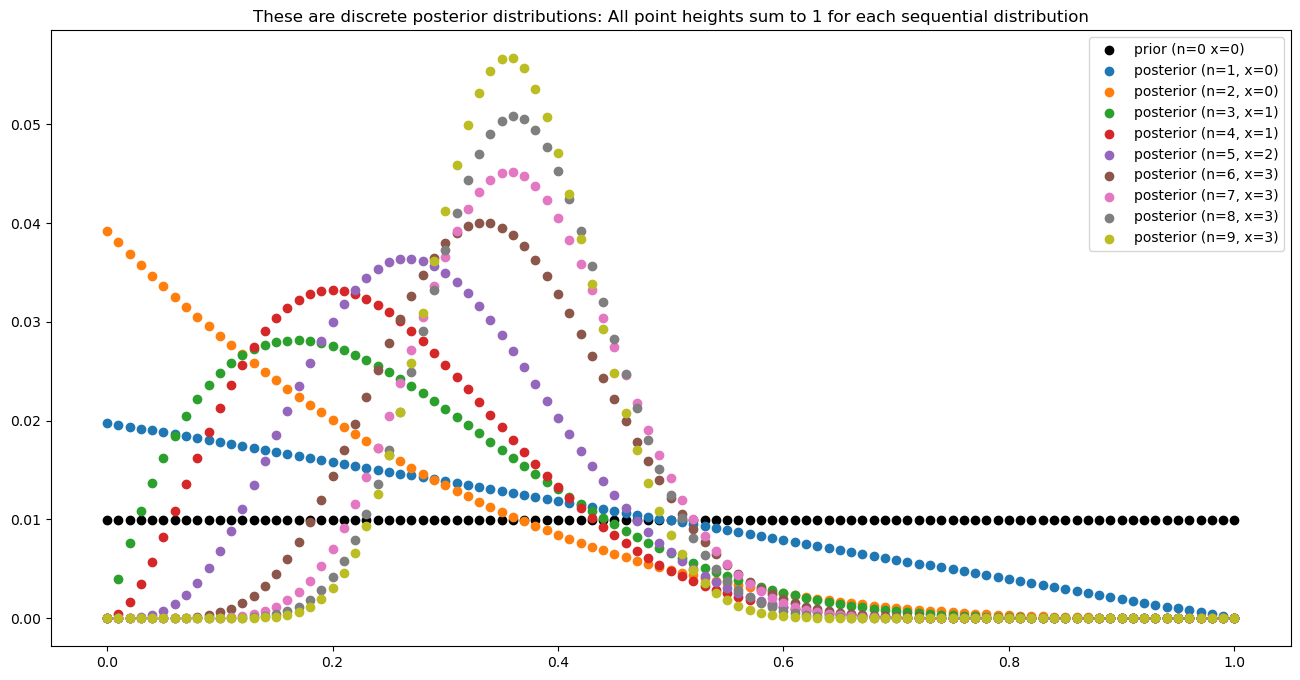

In [4]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation
    
    # compute likelihood for x successes out of n
    # (Note: The binomial coefficient is constant in theta, so we can
    # just multiply by binom.pmf(...) or by theta^x * (1-theta)^(n-x).)
    likelihood = stats.binom.pmf(x, n, parameter_domain)
    
    # unnormalized posterior = prior * likelihood
    posterior_unnorm = prior * likelihood
    
    # normalize
    posterior = posterior_unnorm / posterior_unnorm.sum()
    
    prior = posterior
    
    # plot and set up for next iteration
    plt.scatter(parameter_domain, posterior,
                label=f"posterior (n={n}, x={x})")

plt.legend()
plt.show();

## Bayesian/Sequential Learning

A prior is updated to a posterior which becomes the new prior for the next data

\begin{array}{llll}
1.&&\!\!\!\!\!\!&\!\!\!\!\!\!p(\theta | x_1) \propto {} f(x_1|\theta)p(\theta) \\
2.&&\!\!\!\!\!\! p(\theta | x_1, x_2) \propto f(x_2|\theta)&\!\!\!\!\!\!p(\theta | x_1) \\
3.&p(\theta | x_1, x_2, x_3) \propto{} f(x_3|\theta) & \!\!\!\!\!\! p(\theta | x_1, x_2)  \\
\vdots\\
\end{array}

### But this is the same as a single batch update

$$p(\theta | x_1, x_2, x_3) \propto f(x_1,x_2,x_3|\theta)p(\theta)
\overset{(x_i \perp\!\!\perp x_j | \theta)}{=} \underbrace{f(x_1|\theta)f(x_2|\theta)f(x_3|\theta)p(\theta)}_{\left[ \prod_{i=1}^{3}f(x_i|\theta)\right]p(\theta)} $$

## Conditional Independence

\begin{align*}
\text{Conditional Independence} && p(x_2|\theta) &={} p(x_2|x_1,\theta) \; \text{ or } \; (x_2 \perp\!\!\!\perp x_1 | \theta)
\end{align*}

\begin{align*}
p(\theta|x_2,x_1) &\propto{} p(x_2, x_1, \theta)\\
& = {} \underbrace{p(x_2| \theta, x_1)} p(x_1 | \theta) p(\theta)
\color{gray}{\longleftarrow \text{chain rule}}\\
& \quad (x_2 \perp\!\!\!\perp x_1 | \theta)\\
& = {} \overbrace{\;\;p(x_2| \theta)\;\;} \underbrace{p(x_1 | \theta) p(\theta)}_{\propto \; p(\theta|x_1)}\\
&\propto{}  p(x_2| \theta) \underbrace{p(\theta | x_1)}_{\text{new prior}} \longleftarrow \text{previous posterior}
\end{align*}

A prior is updated to a posterior which becomes the new prior for the next data

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

$$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{Beta distribution}$$

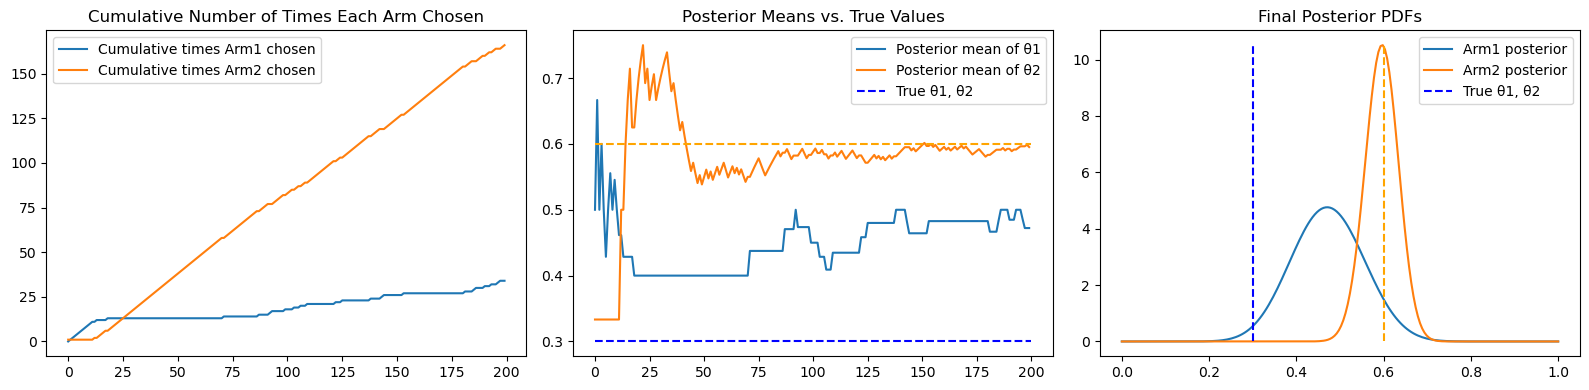

In [7]:
from scipy.stats import beta

# True (unknown) parameters, with theta1 < theta2
theta1_true = 0.30
theta2_true = 0.60

# Number of Thompson-sampling iterations
T = 200

# Initialize counters: n_j = total flips, x_j = total successes
# Start with Beta(1,1) priors => alpha_j=1+x_j, beta_j=1+n_j-x_j
n1 = 0; x1 = 0
n2 = 0; x2 = 0

# Keep track of which arm was chosen, success or not, etc. for plotting
choices = []
successes = []
posterior_means_arm1 = []
posterior_means_arm2 = []

for t in range(T):
    # Sample from each arm's current Beta posterior
    sample1 = np.random.beta(1 + x1, 1 + n1 - x1)
    sample2 = np.random.beta(1 + x2, 1 + n2 - x2)
    
    # Choose the arm with the larger sampled value
    if sample1 > sample2:
        chosen_arm = 1
        reward = (np.random.rand() < theta1_true)
        # Update counts
        n1 += 1
        x1 += reward
    else:
        chosen_arm = 2
        reward = (np.random.rand() < theta2_true)
        # Update counts
        n2 += 1
        x2 += reward

    # Store for visualization
    choices.append(chosen_arm)
    successes.append(reward)
    # Posterior mean (alpha / (alpha+beta)) for each arm
    mean1 = (1 + x1) / ((1 + x1) + (1 + n1 - x1))
    mean2 = (1 + x2) / ((1 + x2) + (1 + n2 - x2))
    posterior_means_arm1.append(mean1)
    posterior_means_arm2.append(mean2)

# ---- Plot Results ----

fig, axs = plt.subplots(1,3, figsize=(16,4))

# 1) Plot how often each arm is chosen over time
axs[0].plot(np.cumsum([1 if c==1 else 0 for c in choices]),
            label="Cumulative times Arm1 chosen")
axs[0].plot(np.cumsum([1 if c==2 else 0 for c in choices]),
            label="Cumulative times Arm2 chosen")
axs[0].set_title("Cumulative Number of Times Each Arm Chosen")
axs[0].legend()

# 2) Plot posterior means for each arm
axs[1].plot(posterior_means_arm1, label="Posterior mean of θ1")
axs[1].plot(posterior_means_arm2, label="Posterior mean of θ2")
axs[1].hlines([theta1_true, theta2_true], 0, T, 
              colors=['blue','orange'], linestyles='--', 
              label="True θ1, θ2")
axs[1].set_title("Posterior Means vs. True Values")
axs[1].legend()

# 3) Final posterior distributions
# We'll sample a grid of theta values from 0..1 and compute Beta pdf for each arm
theta_grid = np.linspace(0,1,200)
post_pdf_arm1 = beta.pdf(theta_grid, 1 + x1, 1 + (n1 - x1))
post_pdf_arm2 = beta.pdf(theta_grid, 1 + x2, 1 + (n2 - x2))
axs[2].plot(theta_grid, post_pdf_arm1, label="Arm1 posterior")
axs[2].plot(theta_grid, post_pdf_arm2, label="Arm2 posterior")
axs[2].vlines([theta1_true, theta2_true], 0, max(max(post_pdf_arm1), max(post_pdf_arm2)), 
              colors=['blue','orange'], linestyles='--', 
              label="True θ1, θ2")
axs[2].set_title("Final Posterior PDFs")
axs[2].legend()

plt.tight_layout()
plt.show()

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

# Q3

In this question, we imagine **three** “entities” (or arms, or variants) each producing *binary* (0/1) outcomes with different success probabilities. We compare two ways to do Bayesian inference and A/B/C testing on these data:

1. **Analysis 1**: **Independent Beta‐Binomial models**  
   - We treat each entity’s success probability \($\theta_j$\) **independently**, with a Beta prior for each \($\theta_j$\).  
   - After observing \($n_j$\) trials and \($x_j$\) successes, the **posterior** for \($\theta_j$\) is  
   $$
   \theta_j \,\big|\,(n_j, x_j) \;\sim\; 
   \mathrm{Beta}\bigl(\alpha_j + x_j,\;\beta_j + (n_j - x_j)\bigr).
   $$
   - *If we assume a uniform prior*, that means \($\alpha_j$ = 1\) and \($\beta_j$ = 1\) initially for each arm \(j $\in \{1,2,3\}$\).

2. **Analysis 2**: **Single Dirichlet‐Multinomial model**  
   - We assume all three probabilities \($\boldsymbol{\theta}$ = ($\theta_1$,$\theta_2$,$\theta_3$)\) are part of a single *multinomial* experiment (with \($\theta_1$ + $\theta_2$ + $\theta_3$ = 1\)).  
   - We place a **Dirichlet prior** on \($\boldsymbol{\theta}$\), say  
   $$
   \boldsymbol{\theta} \;\sim\; \mathrm{Dirichlet}(\alpha_1,\;\alpha_2,\;\alpha_3).
   $$
   - After observing data counts \($\bigl(n_1, n_2, n_3\bigr)$\) (where \($n_1$ + $n_2$ + $n_3$ = N\) is total number of “trials,” each trial choosing exactly **one** of the three categories), the posterior is  
   $$
   \boldsymbol{\theta} \,\big|\,(n_1,\,n_2,\,n_3)
   \;\sim\; 
   \mathrm{Dirichlet}\bigl(\alpha_1 + n_1,\;\alpha_2 + n_2,\;\alpha_3 + n_3\bigr).
   $$
   - If the model is truly a single, three‐category process, this can *shrink* the estimates toward each other more than three separate Beta distributions might.

---

## Which approach is more appropriate?

It depends on the assumptions about how these three arms (or entities) are generated and how correlated (if at all) we believe their probabilities to be:

1. **Independent Beta‐Binomial** (Analysis 1) is simplest if each arm’s success process is *truly independent* of the others. For example, if we are testing *three completely different marketing campaigns* and each campaign’s success probability is logically unrelated to the others, it is natural to assign them each their own prior with no “pooling” of information.

2. **Dirichlet‐Multinomial** (Analysis 2) is more appropriate if we believe each trial or user must produce exactly one outcome among three *mutually exclusive* categories.  For instance, if each user can “only click *one of three ads*,” a single Dirichlet prior on \(($\theta_1$,$\theta_2$,$\theta_3$)\) with \($\sum_i$ $\theta_i$ = 1\) is quite natural. This approach *shares information across categories* (via the Dirichlet prior) and can be helpful when sample sizes are small or we strongly believe the categories are competing outcomes of the same underlying process.

---

## Real‐World AB Testing Context

A classic example: 
- Suppose you have a website with *three* versions of a sign‐up form.  Each visitor to the site is shown exactly one version (A, B, or C).  We track whether they sign up (`success=1`) or do not (`success=0`).  
- If the forms are truly independent in terms of layout and user flow (and we do not assume a user will necessarily see all three at once), **Analysis 1** might be more intuitive: treat each variant’s success probability separately, with a Beta prior. Then use a **multi‐armed bandit** strategy (e.g. Thompson sampling) to adaptively serve the form that we *think* will yield more sign‐ups.  

On the other hand:
- Suppose we have *one single page* with three clickable links (A, B, or C), and *exactly one* link can be clicked.  Then each user effectively *multinomially* chooses among the three categories. If that is the structure, the **Dirichlet‐multinomial** approach could model each user’s single choice across three categories. Over time, it learns which link is most popular (or “successful”) while sharing partial information across them.

In both scenarios, **Bayesian multi‐armed bandits** help us **balance exploration vs. exploitation**—initially exploring all arms to gather knowledge, then increasingly exploiting whichever arm is better, all while maintaining valid posterior uncertainty to keep exploring if we are still uncertain.

---

## Illustrative Python Code Snippets

Below are **two** short demos showing how one might do Thompson sampling with three arms. 
The **first** snippet treats them *independently* (Beta‐Binomial). 
The **second** snippet treats them with a single Dirichlet prior (Dirichlet‐Multinomial), under the assumption that exactly one arm is chosen per trial.

In [8]:
# 1) Independent Beta‐Binomial for Three Arms

# True success probabilities for each arm
theta_true = [0.10, 0.20, 0.40]  # assume unknown to us, but we know third is best

# Number of rounds
T = 500

# Initialize Beta(1,1) for each arm j => alpha_j=1 + x_j, beta_j=1 + n_j - x_j
n = [0, 0, 0]  # total trials for each arm
x = [0, 0, 0]  # total successes for each arm

choices = []
rewards = []

for t in range(T):
    # Thompson sampling: sample from Beta posterior for each arm j
    samples = [np.random.beta(1 + x[j], 1 + (n[j]-x[j])) for j in range(3)]
    # pick best sample
    chosen_arm = np.argmax(samples)  
    # "flip" chosen arm
    reward = 1 if (np.random.rand() < theta_true[chosen_arm]) else 0
    # update
    n[chosen_arm] += 1
    x[chosen_arm] += reward
    choices.append(chosen_arm)
    rewards.append(reward)

print("Total times each arm was chosen:", np.bincount(choices))
print("Total successes for each arm:", x)
print("Empirical success rate of each arm:",
      [x[j]/n[j] if n[j]>0 else None for j in range(3)])
print("True success probabilities:", theta_true)

# Over time, we expect the best arm (#2) to be chosen most often

Total times each arm was chosen: [ 21  24 455]
Total successes for each arm: [2, 4, 184]
Empirical success rate of each arm: [0.09523809523809523, 0.16666666666666666, 0.4043956043956044]
True success probabilities: [0.1, 0.2, 0.4]


In [9]:
# 2) Single Dirichlet‐Multinomial model

# True probabilities for one-of-three categories
theta_true = [0.10, 0.20, 0.70]  # must sum to 1

# Number of trials
T = 500

# Dirichlet prior initially alpha=[1,1,1]
alpha = np.array([1.0, 1.0, 1.0])  # alpha_j

counts = np.array([0,0,0])  # will hold number of times each category was chosen

for t in range(T):
    # Thompson sampling step: sample from Dirichlet posterior
    sample = np.random.gamma(alpha, 1.0)  # same as Dirichlet but simpler in code
    sample = sample / sample.sum()        # normalize
    chosen_category = np.argmax(sample)
    
    # "Observe" actual outcome: exactly one category is chosen in reality
    # i.e. the same category we decided to present is the 'success', with prob = theta_true
    # Actually in a real scenario, the user picks among the three simultaneously.
    # For demonstration, let's assume the chosen_category is the "offered" one,
    # and the 'success' probability is theta_true[chosen_category].
    # But we might also pick a category based on random draw from the true distribution:
    #   chosen_category = np.random.choice([0,1,2], p=theta_true)
    reward = (np.random.rand() < theta_true[chosen_category])
    
    # If "success," we increment that category count
    # If we model each trial as exactly one outcome among the 3 possible categories,
    # then we do: 
    outcome_category = chosen_category if reward==1 else -1  # no outcome if reward=0
    # Alternatively we could define the trial as "the user picks category j from {0,1,2}" 
    # but let's keep it simple

    if outcome_category != -1:
        counts[outcome_category] += 1
    
    # Update Dirichlet posterior: alpha_j = 1 + (count of category j)
    alpha = 1 + counts

print("Final alpha vector:", alpha)
print("Estimated category probabilities:", alpha/alpha.sum())
print("True category probabilities:", theta_true)

Final alpha vector: [  1   1 326]
Estimated category probabilities: [0.00304878 0.00304878 0.99390244]
True category probabilities: [0.1, 0.2, 0.7]
